In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [8]:
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

brakujace_obserwacje = przedpandemia.isnull().sum()

print("Liczba brakujących obserwacji dla poszczególnych kolumn:")
print(brakujace_obserwacje)

Liczba brakujących obserwacji dla poszczególnych kolumn:
Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64


In [9]:
file_path_wtrakciepandemii = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_wtrakciepandemii.csv'
wttrakciepandemii = pd.read_csv(file_path_wtrakciepandemii)

brakujace_obserwacje_wtrakciepandemii = wttrakciepandemii.isnull().sum()

print("Liczba brakujących obserwacji dla poszczególnych kolumn:")
print(brakujace_obserwacje_wtrakciepandemii)

Liczba brakujących obserwacji dla poszczególnych kolumn:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
file_path_odwojny = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_odwojny.csv'
odwojny = pd.read_csv(file_path_odwojny)

brakujace_obserwacje_odwojny = odwojny.isnull().sum()

print("Liczba brakujących obserwacji dla poszczególnych kolumn:")
print(brakujace_obserwacje_odwojny)

Liczba brakujących obserwacji dla poszczególnych kolumn:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
# usuniecie obserwacji odstajacych
przedpandemia = przedpandemia.dropna()

In [12]:
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - max_lag:]

X_columns = []
y_columns = []

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')
    y_columns.extend([f't_(-{lag})_Close', f't_(-{lag})_Open', f't_(-{lag})_High'])

X_train = train_data[X_columns]
y_train = train_data[y_columns]

X_test = test_data[X_columns]
y_test = test_data[y_columns]

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0030, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0038, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.3412%, Odchylenie standardowe MAPE: 0.0000

Wyniki dla zbioru testowego:
Średnia MAE: 0.0020, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0027, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.2251%, Odchylenie standardowe MAPE: 0.0000
Czas działania: 2.0522 sekundy
[ 0.92649763  0.02229977  0.07519642 -0.07130728  0.03250185 -0.01543334
  0.0156068   0.00862562 -0.01913461  0.01671314]
0.007278045512138398
[ 0.92649763  0.02229977  0.07519642 -0.07130728  0.03250185 -0.01543334
  0.0156068   0.00862562 -0.01913461  0.01671314]
0.007278045512138398


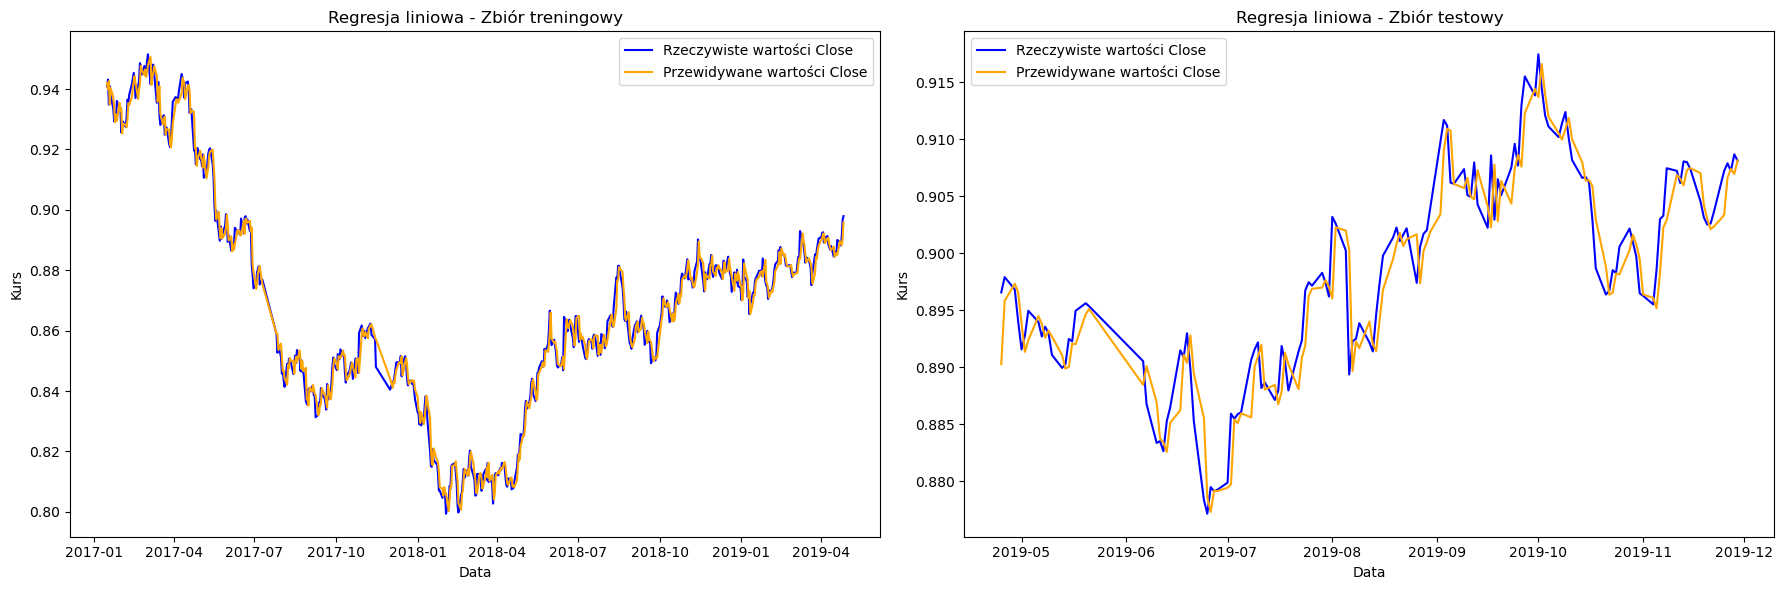

In [13]:
#regrsja liniowa close
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

# Pętla dla 100 iteracji
total_mae_test = 0
total_rmse_test = 0
total_mape_test = 0
total_time_test = 0

total_mae_train = 0
total_rmse_train = 0
total_mape_train = 0
total_time_train = 0

mae_test_list = []
rmse_test_list = []
mape_test_list = []

mae_train_list = []
rmse_train_list = []
mape_train_list = []

for _ in range(100):
    start_time_test = time.time()

    # Tworzenie kopi danych dla zbioru testowego
    przedpandemia_copy_test = przedpandemia.copy()

    for lag in lags:
        for column in columns_to_shift:
            new_column_name = f't_(-{lag})_{column}'
            przedpandemia_copy_test[new_column_name] = przedpandemia_copy_test[column].shift(lag)

    przedpandemia_copy_test['t_Close'] = przedpandemia_copy_test['Close']

    przedpandemia_copy_test = przedpandemia_copy_test.dropna()

    ilosc_danych_test = len(przedpandemia_copy_test)
    ilosc_danych_treningowych_test = int(ilosc_danych_test * 0.8)

    train_data_test = przedpandemia_copy_test[:ilosc_danych_treningowych_test]
    test_data_test = przedpandemia_copy_test[ilosc_danych_treningowych_test - 2:]

    X_columns_test = []
    y_column_test = 't_Close'

    for lag in lags:
        for column in columns_to_shift:
            X_columns_test.append(f't_(-{lag})_{column}')

    X_train_test = train_data_test[X_columns_test]
    y_train_test = train_data_test[y_column_test]

    X_test_test = test_data_test[X_columns_test]
    y_test_test = test_data_test[y_column_test]

    model_test = LinearRegression()
    model_test.fit(X_train_test, y_train_test)
    y_pred_test = model_test.predict(X_test_test)

    mae_test = mean_absolute_error(y_test_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test_test - y_pred_test) / y_test_test)) * 100

    total_mae_test += mae_test
    total_rmse_test += rmse_test
    total_mape_test += mape_test

    end_time_test = time.time()
    elapsed_time_test = end_time_test - start_time_test
    total_time_test += elapsed_time_test

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

    start_time_train = time.time()

    # Tworzenie kopi danych dla zbioru treningowego
    przedpandemia_copy_train = przedpandemia.copy()

    for lag in lags:
        for column in columns_to_shift:
            new_column_name = f't_(-{lag})_{column}'
            przedpandemia_copy_train[new_column_name] = przedpandemia_copy_train[column].shift(lag)

    przedpandemia_copy_train['t_Close'] = przedpandemia_copy_train['Close']

    przedpandemia_copy_train = przedpandemia_copy_train.dropna()

    ilosc_danych_train = len(przedpandemia_copy_train)
    ilosc_danych_treningowych_train = int(ilosc_danych_train * 0.8)

    train_data_train = przedpandemia_copy_train[:ilosc_danych_treningowych_train]

    X_columns_train = []
    y_column_train = 't_Close'

    for lag in lags:
        for column in columns_to_shift:
            X_columns_train.append(f't_(-{lag})_{column}')

    X_train_train = train_data_train[X_columns_train]
    y_train_train = train_data_train[y_column_train]

    model_train = LinearRegression()
    model_train.fit(X_train_train, y_train_train)
    y_pred_train = model_train.predict(X_train_train)

    mae_train = mean_absolute_error(y_train_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train_train - y_pred_train) / y_train_train)) * 100

    total_mae_train += mae_train
    total_rmse_train += rmse_train
    total_mape_train += mape_train

    end_time_train = time.time()
    elapsed_time_train = end_time_train - start_time_train
    total_time_train += elapsed_time_train

    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

# Odchylenia standardowe
std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

# Usrednione wyniki dla zbioru testowego
average_mae_test = total_mae_test / 100
average_rmse_test = total_rmse_test / 100
average_mape_test = total_mape_test / 100

# Usrednione wyniki dla zbioru treningowego
average_mae_train = total_mae_train / 100
average_rmse_train = total_rmse_train / 100
average_mape_train = total_mape_train / 100

# Wyświetlanie wyników średnich dla zbioru treningowego
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {average_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {average_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {average_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

# Wyświetlanie wyników średnich dla zbioru testowego
print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {average_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {average_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {average_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

# Rysowanie wykresów poziomo ułożonych obok siebie
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Wykres dla zbioru treningowego
axes[0].plot(train_data_train['Date'], y_train_train, label='Rzeczywiste wartości Close', color='blue')
axes[0].plot(train_data_train['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
axes[0].set_title('Regresja liniowa - Zbiór treningowy')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Kurs')
axes[0].legend()

# Wykres dla zbioru testowego
axes[1].plot(test_data_test['Date'], y_test_test, label='Rzeczywiste wartości Close', color='blue')
axes[1].plot(test_data_test['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
axes[1].set_title('Regresja liniowa - Zbiór testowy')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Kurs')
axes[1].legend()

plt.tight_layout()
#plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('reg_clse.png')

print(model_test.coef_)
print(model_test.intercept_)

print(model_train.coef_)
print(model_train.intercept_)

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0020, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0026, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.2277%, Odchylenie standardowe MAPE: 0.0000

Wyniki dla zbioru testowego:
Średnia MAE: 0.0017, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0022, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.1913%, Odchylenie standardowe MAPE: 0.0000
Czas działania: 3.7039 sekundy
[ 1.38976826 -1.76076138  1.36848872  0.74664636 -0.71865243 -0.04806031
 -1.14174478  1.27888562 -0.06759896  0.84037461 -0.7641635  -0.11546744
  1.08878462 -1.05171672 -0.05450326 -0.70785962  0.73134964  0.01646361
 -0.61013349  0.78292991 -0.13853477  0.29281066 -0.20268495 -0.15850993
 -0.87282216  0.87534371 -0.04364583 -0.25873041  0.21886454  0.08156722]
0.0007121583091068695


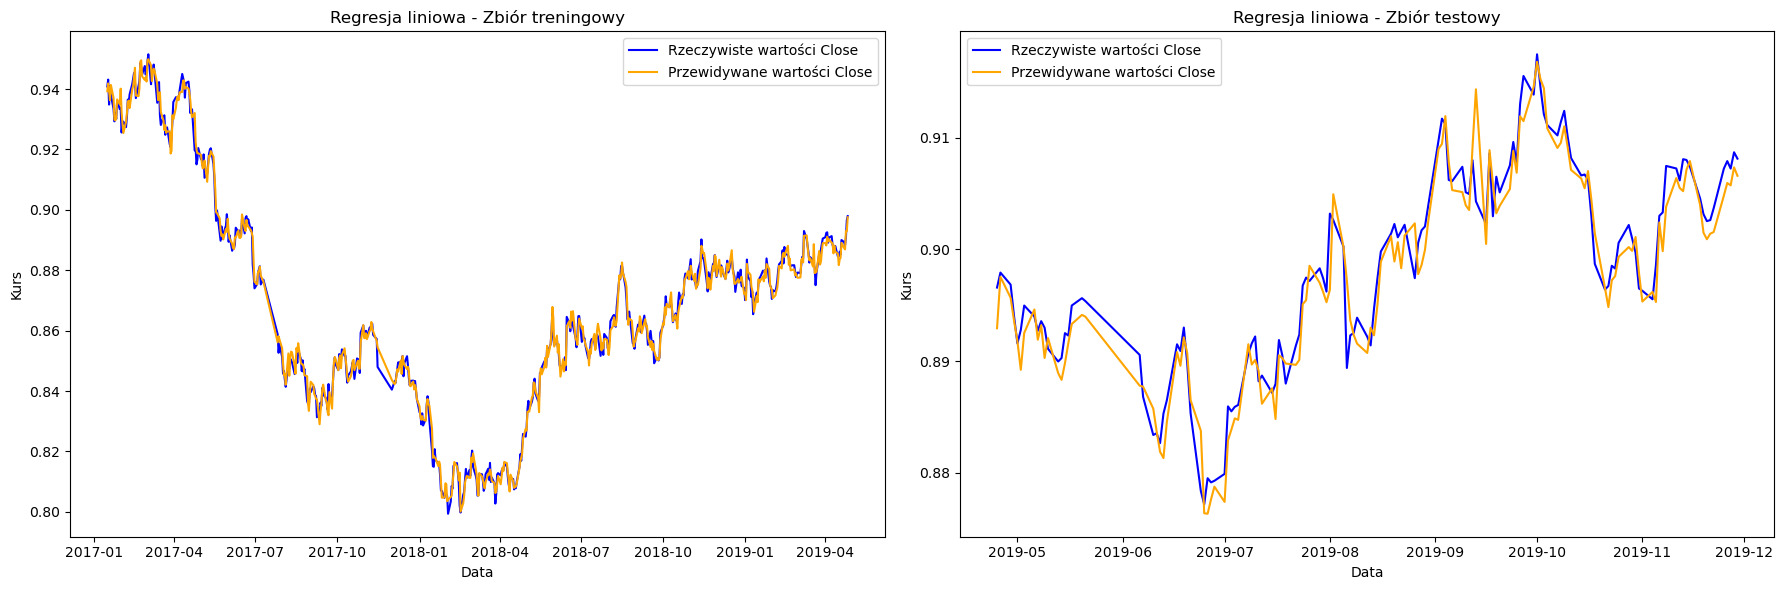

In [14]:
# regresja  liniowa close open high
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

# Pętla dla 100 iteracji
total_mae_test = 0
total_rmse_test = 0
total_mape_test = 0
total_time_test = 0

total_mae_train = 0
total_rmse_train = 0
total_mape_train = 0
total_time_train = 0

mae_test_list = []
rmse_test_list = []
mape_test_list = []

mae_train_list = []
rmse_train_list = []
mape_train_list = []

for _ in range(100):
    start_time_train = time.time()

    # Tworzenie kopi danych dla zbioru treningowego
    przedpandemia_copy_train = przedpandemia.copy()

    for lag in lags:
        for column in columns_to_shift:
            new_column_name = f't_(-{lag})_{column}'
            przedpandemia_copy_train[new_column_name] = przedpandemia_copy_train[column].shift(lag)

    przedpandemia_copy_train['t_Close'] = przedpandemia_copy_train['Close']

    przedpandemia_copy_train = przedpandemia_copy_train.dropna()

    ilosc_danych_train = len(przedpandemia_copy_train)
    ilosc_danych_treningowych_train = int(ilosc_danych_train * 0.8)

    train_data_train = przedpandemia_copy_train[:ilosc_danych_treningowych_train]

    X_columns_train = []
    y_column_train = 't_Close'

    for lag in lags:
        for column in columns_to_shift:
            X_columns_train.append(f't_(-{lag})_{column}')

    X_train_train = train_data_train[X_columns_train]
    y_train_train = train_data_train[y_column_train]

    model_train = LinearRegression()
    model_train.fit(X_train_train, y_train_train)
    y_pred_train = model_train.predict(X_train_train)

    mae_train = mean_absolute_error(y_train_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train_train - y_pred_train) / y_train_train)) * 100

    total_mae_train += mae_train
    total_rmse_train += rmse_train
    total_mape_train += mape_train

    end_time_train = time.time()
    elapsed_time_train = end_time_train - start_time_train
    total_time_train += elapsed_time_train

    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)


    # Tworzenie kopi danych dla zbioru testowego
    przedpandemia_copy_test = przedpandemia.copy()

    for lag in lags:
        for column in columns_to_shift:
            new_column_name = f't_(-{lag})_{column}'
            przedpandemia_copy_test[new_column_name] = przedpandemia_copy_test[column].shift(lag)

    przedpandemia_copy_test['t_Close'] = przedpandemia_copy_test['Close']

    przedpandemia_copy_test = przedpandemia_copy_test.dropna()

    ilosc_danych_test = len(przedpandemia_copy_test)
    ilosc_danych_treningowych_test = int(ilosc_danych_test * 0.8)

    train_data_test = przedpandemia_copy_test[:ilosc_danych_treningowych_test]
    test_data_test = przedpandemia_copy_test[ilosc_danych_treningowych_test - 2:]

    X_columns_test = []
    y_column_test = 't_Close'

    for lag in lags:
        for column in columns_to_shift:
            X_columns_test.append(f't_(-{lag})_{column}')

    X_train_test = train_data_test[X_columns_test]
    y_train_test = train_data_test[y_column_test]

    X_test_test = test_data_test[X_columns_test]
    y_test_test = test_data_test[y_column_test]

    model_test = LinearRegression()
    model_test.fit(X_train_test, y_train_test)
    y_pred_test = model_test.predict(X_test_test)

    mae_test = mean_absolute_error(y_test_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test_test - y_pred_test) / y_test_test)) * 100

    total_mae_test += mae_test
    total_rmse_test += rmse_test
    total_mape_test += mape_test

    end_time_test = time.time()
    elapsed_time_test = end_time_test - start_time_test
    total_time_test += elapsed_time_test

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

# Odchylenia standardowe
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

# Usrednione wyniki dla zbioru treningowego
average_mae_train = total_mae_train / 100
average_rmse_train = total_rmse_train / 100
average_mape_train = total_mape_train / 100

# Usrednione wyniki dla zbioru testowego
average_mae_test = total_mae_test / 100
average_rmse_test = total_rmse_test / 100
average_mape_test = total_mape_test / 100

# Wyświetlanie wyników średnich dla zbioru treningowego
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {average_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {average_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {average_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

# Wyświetlanie wyników średnich dla zbioru testowego
print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {average_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {average_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {average_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

# Rysowanie wykresów poziomo ułożonych obok siebie
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Wykres dla zbioru treningowego
axes[0].plot(train_data_train['Date'], y_train_train, label='Rzeczywiste wartości Close', color='blue')
axes[0].plot(train_data_train['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
axes[0].set_title('Regresja liniowa - Zbiór treningowy')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Kurs')
axes[0].legend()

# Wykres dla zbioru testowego
axes[1].plot(test_data_test['Date'], y_test_test, label='Rzeczywiste wartości Close', color='blue')
axes[1].plot(test_data_test['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
axes[1].set_title('Regresja liniowa - Zbiór testowy')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Kurs')
axes[1].legend()

plt.tight_layout()
#plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")
#plt.savefig('reg_coh.png')

print(model_test.coef_)
print(model_test.intercept_)

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0000, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0000, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.0000%, Odchylenie standardowe MAPE: 0.0000

Wyniki dla zbioru testowego:
Średnia MAE: 0.0000, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0000, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.0000%, Odchylenie standardowe MAPE: 0.0000
Czas całkowity: 0.7210 sekundy
[ 1.38976826 -1.76076138  1.36848872  0.74664636 -0.71865243 -0.04806031
 -1.14174478  1.27888562 -0.06759896  0.84037461 -0.7641635  -0.11546744
  1.08878462 -1.05171672 -0.05450326 -0.70785962  0.73134964  0.01646361
 -0.61013349  0.78292991 -0.13853477  0.29281066 -0.20268495 -0.15850993
 -0.87282216  0.87534371 -0.04364583 -0.25873041  0.21886454  0.08156722]
0.0007121583091068695


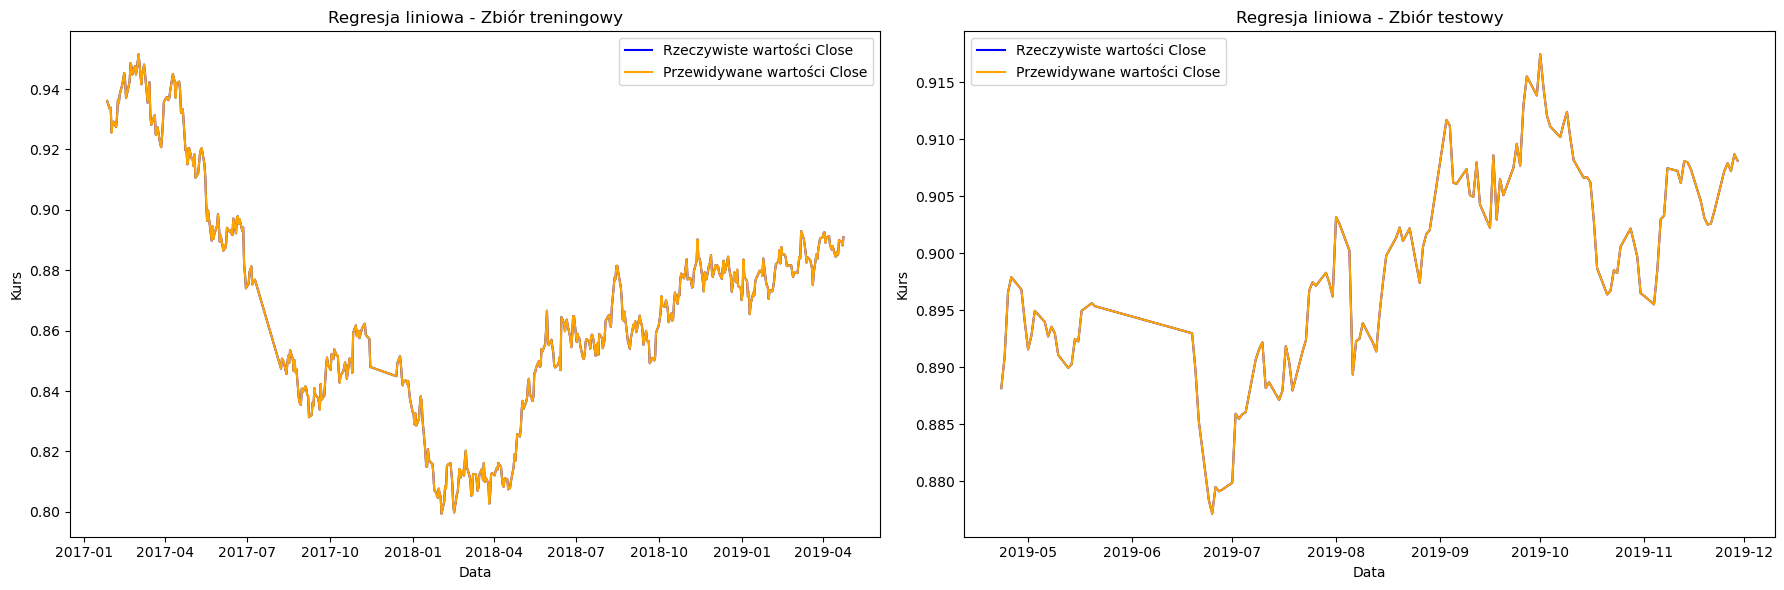

In [15]:
# regresja liniowa close open high + analiza technicza
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import numpy as np
import time
import ta  

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']

# Dodanie kolumny 'WMA' (Weighted Moving Average)
okres_wma = 10
przedpandemia['WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()

# Dodanie kolumny 'SAR' (Parabolic SAR)
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodanie kolumn związanych z Wstęgami Bollingera
okres_sma = 20
przedpandemia['SMA'] = przedpandemia['Close'].rolling(window=okres_sma).mean()
przedpandemia['STD'] = przedpandemia['Close'].rolling(window=okres_sma).std()
przedpandemia['Upper'] = przedpandemia['SMA'] + 2 * przedpandemia['STD']
przedpandemia['Lower'] = przedpandemia['SMA'] - 2 * przedpandemia['STD']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = ['Close', 'Open', 'High', 'WMA', 'SAR', 'SMA', 'STD', 'Upper', 'Lower']
y_column = 't_Close'

# Przygotowanie do wielokrotnego uruchomienia regresji liniowej
total_mae_test = 0
total_rmse_test = 0
total_mape_test = 0
total_time_test = 0

total_mae_train = 0
total_rmse_train = 0
total_mape_train = 0
total_time_train = 0

mae_test_list = []
rmse_test_list = []
mape_test_list = []

mae_train_list = []
rmse_train_list = []
mape_train_list = []

for i in range(100):
    X_train = train_data[X_columns]
    y_train = train_data[y_column]

    X_test = test_data[X_columns]
    y_test = test_data[y_column]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predykcja na danych testowych
    y_pred_test = model.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    mae_train_list.append(mae_test)
    rmse_train_list.append(rmse_test)
    mape_train_list.append(mape_test)
    total_mae_train += mae_test
    total_rmse_train += rmse_test
    total_mape_train += mape_test
    
    total_mae_test += mae_test
    total_rmse_test += rmse_test
    total_mape_test += mape_test
    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

# Wizualizacja wyników na danych treningowych i testowych (tylko ostatnia iteracja)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Wykres dla danych treningowych
axes[0].plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
axes[0].plot(train_data['Date'], model.predict(X_train), label='Przewidywane wartości Close', color='orange')
axes[0].set_title('Regresja liniowa - Zbiór treningowy')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Kurs')
axes[0].legend()

# Wykres dla danych testowych
axes[1].plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
axes[1].plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
axes[1].set_title('Regresja liniowa - Zbiór testowy')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Kurs')
axes[1].legend()

plt.tight_layout()
#plt.show()

# Średnie metryki
average_mae_train = total_mae_train / 100
average_rmse_train = total_rmse_train / 100
average_mape_train = total_mape_train / 100

average_mae_test = total_mae_test / 100
average_rmse_test = total_rmse_test / 100
average_mape_test = total_mape_test / 100

# Odchylenie standardowe
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

# Wyświetlanie wyników średnich dla zbioru treningowego
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {average_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {average_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {average_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

# Wyświetlanie wyników średnich dla zbioru testowego
print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {average_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {average_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {average_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

# Całkowity czas działania
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas całkowity: {elapsed_time:.4f} sekundy")

#plt.savefig('reg_wskaz.png')

print(model_test.coef_)
print(model_test.intercept_)

Mean Train Metrics over 100 runs:
Mean MAE: 0.0164, Std MAE: 0.0000
Mean RMSE: 0.0207, Std RMSE: 0.0000
Mean MAPE: 1.8832%, Std MAPE: 0.0000

Mean Test Metrics over 100 runs:
Mean MAE: 0.0171, Std MAE: 0.0000
Mean RMSE: 0.0178, Std RMSE: 0.0000
Mean MAPE: 1.8932%, Std MAPE: 0.0000
Czas działania dla 100 przebiegów: 0.6547 sekundy
[0.4316076]
0.4935571613703955


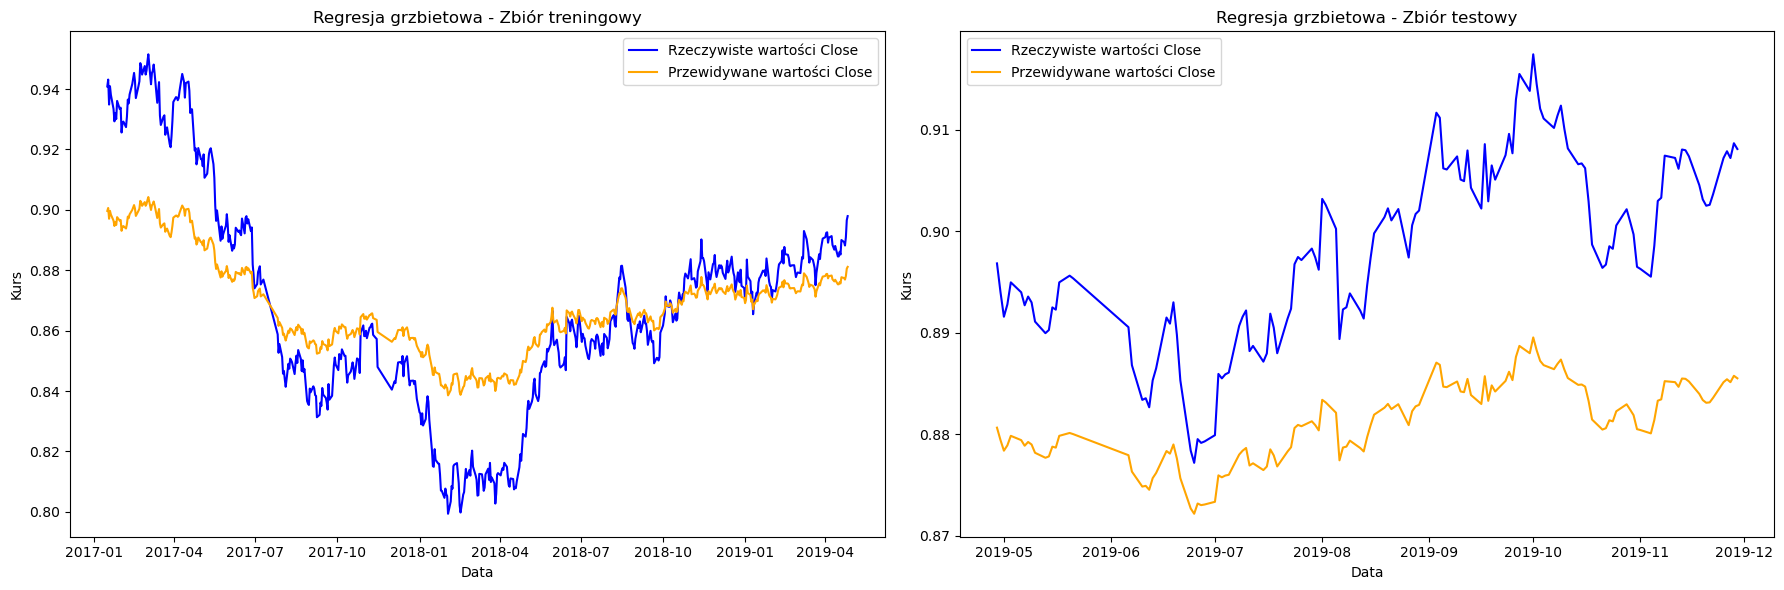

In [16]:
# regresja grzbietowa na close
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

# Store metrics for each run
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

start_time = time.time()

for run in range(100):
    train_data = przedpandemia[:ilosc_danych_treningowych]
    test_data = przedpandemia[ilosc_danych_treningowych:]

    X_train = train_data[['Close']]
    y_train = train_data['Close']

    X_test = test_data[['Close']]
    y_test = test_data['Close']
    
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)

    y_pred_train = ridge_model.predict(X_train)
    y_pred_test = ridge_model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

# Calculate mean metrics over 100 runs
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print(f'Mean Train Metrics over 100 runs:')
print(f'Mean MAE: {mean_mae_train:.4f}, Std MAE: {std_mae_train:.4f}')
print(f'Mean RMSE: {mean_rmse_train:.4f}, Std RMSE: {std_rmse_train:.4f}')
print(f'Mean MAPE: {mean_mape_train:.4f}%, Std MAPE: {std_mape_train:.4f}')

print(f'\nMean Test Metrics over 100 runs:')
print(f'Mean MAE: {mean_mae_test:.4f}, Std MAE: {std_mae_test:.4f}')
print(f'Mean RMSE: {mean_rmse_test:.4f}, Std RMSE: {std_rmse_test:.4f}')
print(f'Mean MAPE: {mean_mape_test:.4f}%, Std MAPE: {std_mape_test:.4f}')

# Plot the final graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for the training set
axs[0].plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
axs[0].plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
axs[0].set_title('Regresja grzbietowa - Zbiór treningowy')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Kurs')
axs[0].legend()

# Plot for the test set
axs[1].plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
axs[1].plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
axs[1].set_title('Regresja grzbietowa - Zbiór testowy')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Kurs')
axs[1].legend()

# y_min = min(min(y_train), min(y_test), min(y_pred_train), min(y_pred_test))
# y_max = max(max(y_train), max(y_test), max(y_pred_train), max(y_pred_test))
# axs[0].set_ylim([y_min, y_max])
# axs[1].set_ylim([y_min, y_max])
plt.tight_layout()
#plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania dla 100 przebiegów: {elapsed_time:.4f} sekundy")
#plt.savefig('grzb_close.png')

print(ridge_model.coef_)
print(ridge_model.intercept_)

Mean Train Metrics over 100 runs:
Mean MAE: 0.0088, Std MAE: 0.0000
Mean RMSE: 0.0111, Std RMSE: 0.0000
Mean MAPE: 1.0143%, Std MAPE: 0.0000

Mean Test Metrics over 100 runs:
Mean MAE: 0.0093, Std MAE: 0.0000
Mean RMSE: 0.0097, Std RMSE: 0.0000
Mean MAPE: 1.0315%, Std MAPE: 0.0000
Czas działania dla 100 przebiegów: 0.9007 sekundy
[0.23211096 0.23216191 0.23078999]
0.26419794284837983


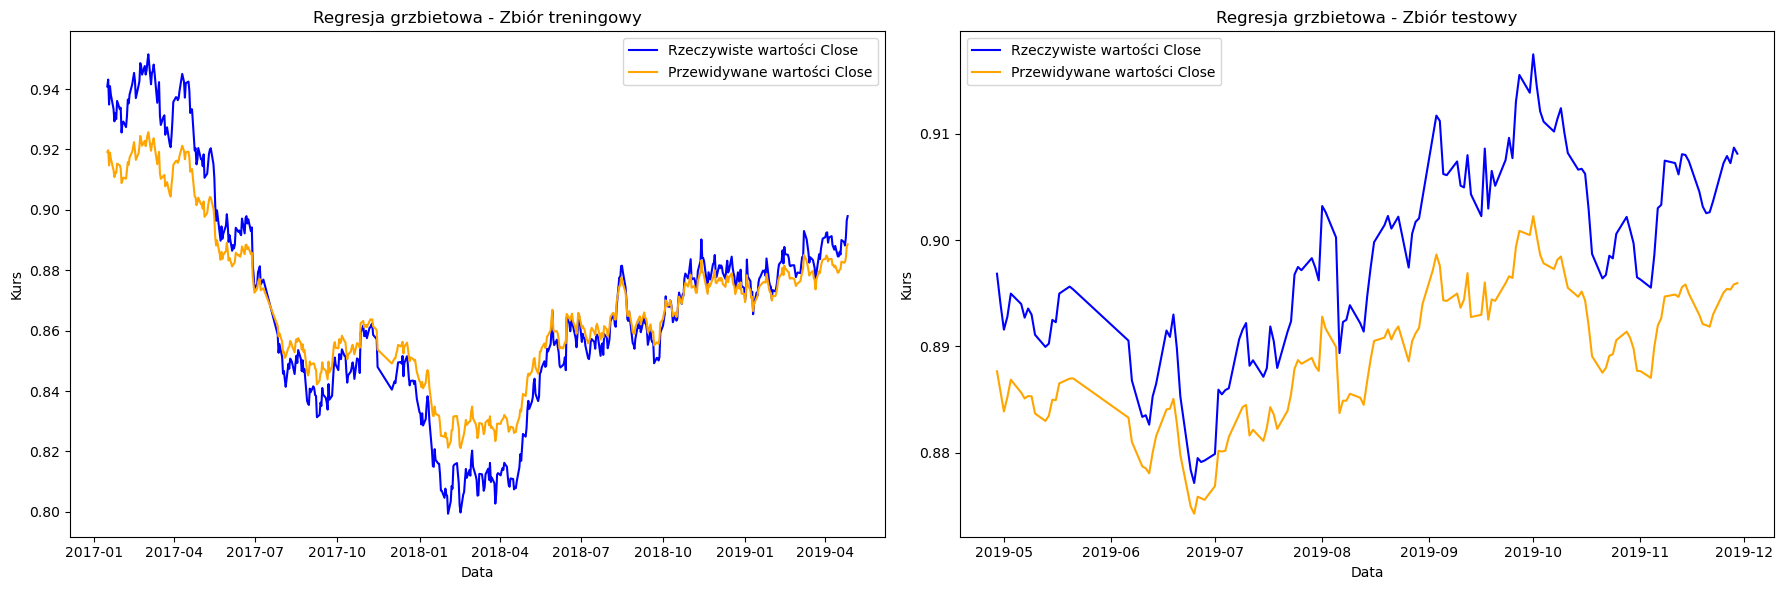

In [18]:
# regresja grzbietowa na close open high
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

# Store metrics for each run
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

start_time = time.time()

for run in range(100):
    train_data = przedpandemia[:ilosc_danych_treningowych]
    test_data = przedpandemia[ilosc_danych_treningowych:]

    X_train = train_data[['Close', 'Open', 'High']]
    y_train = train_data['Close']

    X_test = test_data[['Close', 'Open', 'High']]
    y_test = test_data['Close']
    
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)

    y_pred_train = ridge_model.predict(X_train)
    y_pred_test = ridge_model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

# Calculate mean metrics over 100 runs
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print(f'Mean Train Metrics over 100 runs:')
print(f'Mean MAE: {mean_mae_train:.4f}, Std MAE: {std_mae_train:.4f}')
print(f'Mean RMSE: {mean_rmse_train:.4f}, Std RMSE: {std_rmse_train:.4f}')
print(f'Mean MAPE: {mean_mape_train:.4f}%, Std MAPE: {std_mape_train:.4f}')

print(f'\nMean Test Metrics over 100 runs:')
print(f'Mean MAE: {mean_mae_test:.4f}, Std MAE: {std_mae_test:.4f}')
print(f'Mean RMSE: {mean_rmse_test:.4f}, Std RMSE: {std_rmse_test:.4f}')
print(f'Mean MAPE: {mean_mape_test:.4f}%, Std MAPE: {std_mape_test:.4f}')

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for the training set
axs[0].plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
axs[0].plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
axs[0].set_title('Regresja grzbietowa - Zbiór treningowy')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Kurs')
axs[0].legend()

# Plot for the test set
axs[1].plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
axs[1].plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
axs[1].set_title('Regresja grzbietowa - Zbiór testowy')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Kurs')
axs[1].legend()
plt.tight_layout()
#plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania dla 100 przebiegów: {elapsed_time:.4f} sekundy")

#plt.savefig('grzb_coh.png')

print(ridge_model.coef_)
print(ridge_model.intercept_)

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0054, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0067, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.6184%, Odchylenie standardowe MAPE: 0.0000

Wyniki dla zbioru testowego:
Średnia MAE: 0.0045, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0054, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.5051%, Odchylenie standardowe MAPE: 0.0000
Czas działania: 2.0929 sekundy
[0.03528499 0.03527223 0.03782339 0.01779776 0.01779407 0.01894401
 0.00399735 0.00429634 0.02967519 0.02966442 0.03164775 0.00380928
 0.02513327 0.02513805 0.02666909 0.00378153 0.02081361 0.02082011
 0.02214469 0.00382065 0.01735065 0.01735024 0.01844913 0.00418292
 0.01427703 0.01427795 0.01533285 0.00470034 0.01177447 0.01176682
 0.01252436 0.00458215 0.00962564 0.00961093 0.01023884 0.00443211
 0.00769783 0.00769731 0.00798408 0.00478424 0.00634496 0.00634264
 0.00662594 0.00487287 0.00533608 0.00535103 0.00558003 0.00400672
 0.01480287 0.01480195 0.

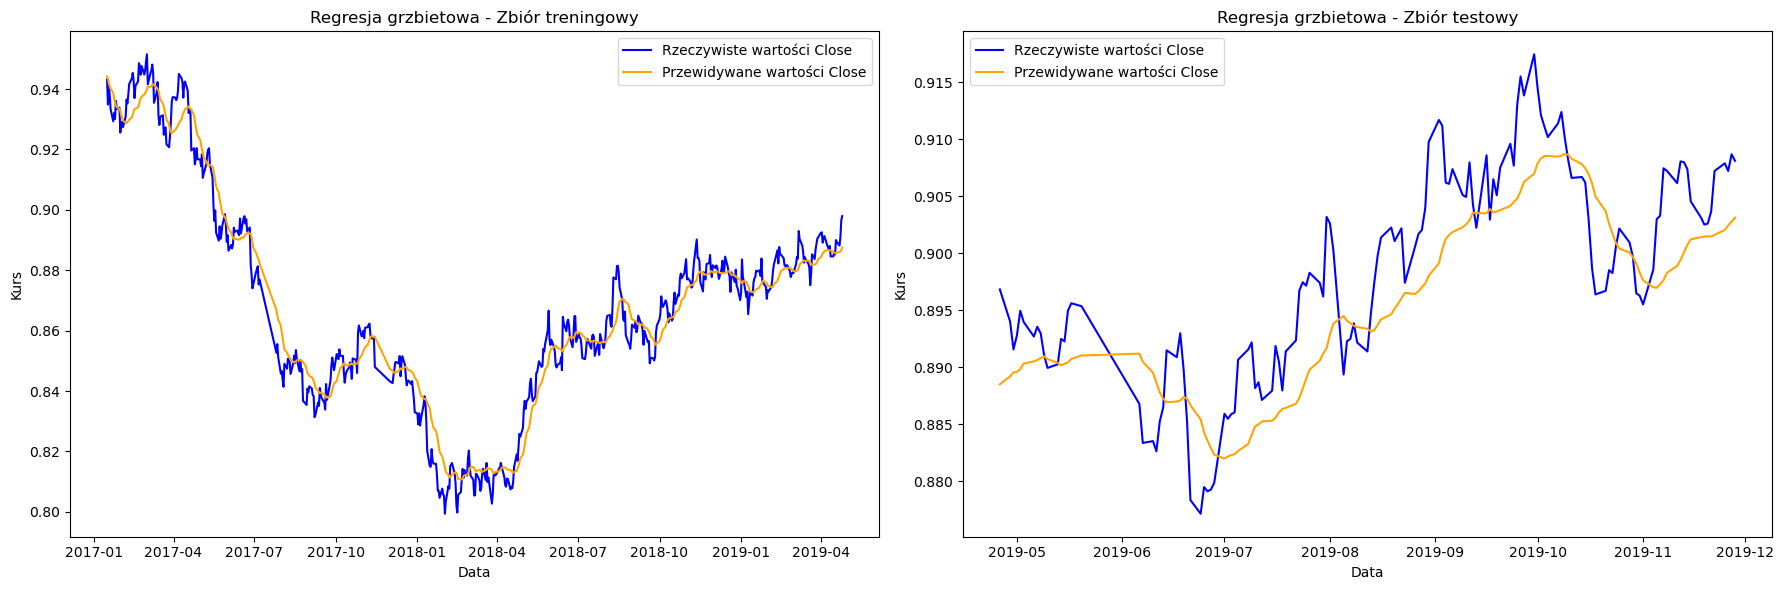

In [20]:
# regresja grzbietowa (Ridge) na close open high + analiza techniczna
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import time
import ta

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']

# Dodanie kolumny 'WMA' (Weighted Moving Average)
okres_wma = 10
przedpandemia['WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()

# Dodanie kolumny 'SAR' (Parabolic SAR)
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'],
                                               close=przedpandemia['Close']).psar()

# Dodanie kolumn związanych z Wstęgami Bollingera
okres_sma = 20
przedpandemia['SMA'] = przedpandemia['Close'].rolling(window=okres_sma).mean()
przedpandemia['STD'] = przedpandemia['Close'].rolling(window=okres_sma).std()
przedpandemia['Upper'] = przedpandemia['SMA'] + 2 * przedpandemia['STD']
przedpandemia['Lower'] = przedpandemia['SMA'] - 2 * przedpandemia['STD']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = ['Close', 'Open', 'High', 'WMA', 'SAR', 'SMA', 'STD', 'Upper', 'Lower']
y_column = 't_Close'

# Przygotowanie do wielokrotnego uruchomienia regresji grzbietowej
total_mae_test = 0
total_rmse_test = 0
total_mape_test = 0
total_time_test = 0

total_mae_train = 0
total_rmse_train = 0
total_mape_train = 0
total_time_train = 0

mae_test_list = []
rmse_test_list = []
mape_test_list = []

mae_train_list = []
rmse_train_list = []
mape_train_list = []

for i in range(100):
    X_train = train_data[X_columns]
    y_train = train_data[y_column]

    X_test = test_data[X_columns]
    y_test = test_data[y_column]

    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)

    # Predykcja na danych testowych
    y_pred_test = ridge_model.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    mae_train_list.append(mae_test)
    rmse_train_list.append(rmse_test)
    mape_train_list.append(mape_test)
    total_mae_train += mae_test
    total_rmse_train += rmse_test
    total_mape_train += mape_test

    total_mae_test += mae_test
    total_rmse_test += rmse_test
    total_mape_test += mape_test
    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

# Wizualizacja wyników na danych treningowych i testowych (tylko ostatnia iteracja)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Wykres dla danych treningowych
axes[0].plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
axes[0].plot(train_data['Date'], ridge_model.predict(X_train), label='Przewidywane wartości Close', color='orange')
axes[0].set_title('Regresja grzbietowa - Zbiór treningowy')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Kurs')
axes[0].legend()

# Wykres dla danych testowych
axes[1].plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
axes[1].plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
axes[1].set_title('Regresja grzbietowa - Zbiór testowy')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Kurs')
axes[1].legend()

plt.tight_layout()
#plt.show()

# Średnie metryki
average_mae_train = total_mae_train / 100
average_rmse_train = total_rmse_train / 100
average_mape_train = total_mape_train / 100

average_mae_test = total_mae_test / 100
average_rmse_test = total_rmse_test / 100
average_mape_test = total_mape_test / 100

# Odchylenie standardowe
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

# Wyświetlanie wyników średnich dla zbioru treningowego
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {average_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {average_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {average_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

# Wyświetlanie wyników średnich dla zbioru testowego
print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {average_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {average_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {average_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

# Całkowity czas działania
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas całkowity: {elapsed_time:.4f} sekundy")

plt.savefig('ridge_wskaz.png')

print(ridge_model.coef_)
print(ridge_model.intercept_)

In [ ]:
# regresja grzbietowa na close open high +  wskazniki techniczne
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time
import ta

start_time = time.time()

# Wczytaj dane
file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

# Przetwarzanie danych
przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

# Przechowuje wyniki treningów
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Pętla trenująca model 100 razy
for i in range(100):
    X_train = train_data[X_columns]
    y_train = train_data[y_column]

    X_test = test_data[X_columns]
    y_test = test_data[y_column]

    ridge_model = Ridge(alpha=1.0) 

    ridge_model.fit(X_train, y_train)

    # Prognozuj dla zbioru treningowego
    y_pred_train = ridge_model.predict(X_train)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

    # Prognozuj dla zbioru testowego
    y_pred_test = ridge_model.predict(X_test)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    # Dodaj wyniki do listy

    if i == 99:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Regresja grzbietowa - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        # Wykres dla ostatniej iteracji - Zbiór testowy
        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Regresja grzbietowa - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('grzb_tech.png')

print(ridge_model.coef_)
print(ridge_model.intercept_)

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0007, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0010, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.6411%, Odchylenie standardowe MAPE: 0.0045

Wyniki dla zbioru testowego:
Średnia MAE: 0.0058, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0070, Odchylenie standardowe RMSE: 0.0001
Średnia MAPE: 0.5051%, Odchylenie standardowe MAPE: 0.0000
Czas działania: 14.5581 sekundy
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


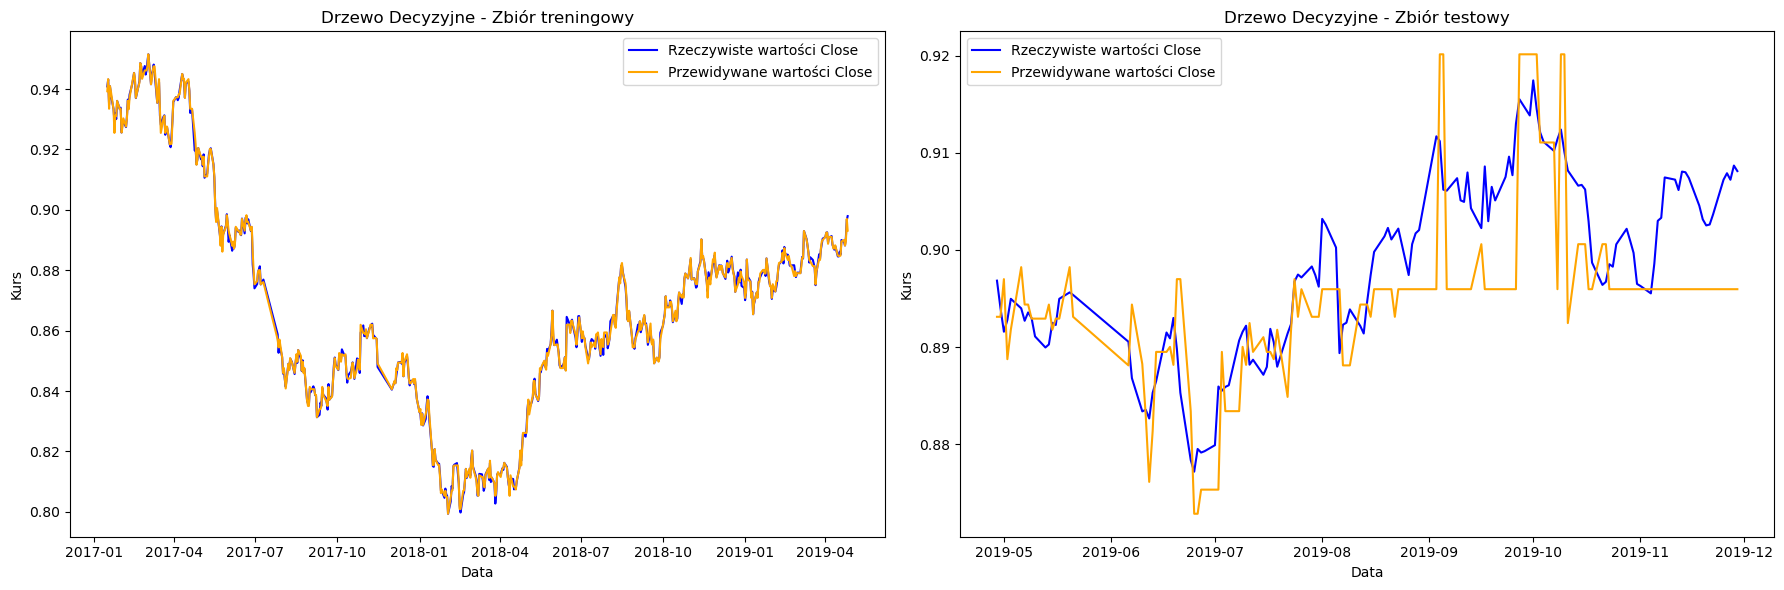

In [21]:
# drzewo decyzyjne close
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time
import pandas as pd

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

# Tuning parametrów drzewa decyzyjnego
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_

mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Pętla trenująca model 100 razy
for i in range(100):
    X_train = train_data[X_columns]
    y_train = train_data[y_column]

    X_test = test_data[X_columns]
    y_test = test_data[y_column]

    # Tworzenie i trenowanie modelu drzewa decyzyjnego
    model = DecisionTreeRegressor(**best_params)
    model.fit(X_train, y_train)

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train)

    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

    # Predykcja na zbiorze testowym
    y_pred_test = model.predict(X_test)

    # Ocena modelu na danych testowych
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_train = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if i == 99:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Drzewo Decyzyjne - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Drzewo Decyzyjne - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('drzewo_close.png')

print(best_params)

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0006, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0009, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.0742%, Odchylenie standardowe MAPE: 0.0000

Wyniki dla zbioru testowego:
Średnia MAE: 0.0050, Odchylenie standardowe MAE: 0.0002
Średnia RMSE: 0.0066, Odchylenie standardowe RMSE: 0.0003
Średnia MAPE: 0.5520%, Odchylenie standardowe MAPE: 0.0232
Czas działania: 5.7062 sekundy


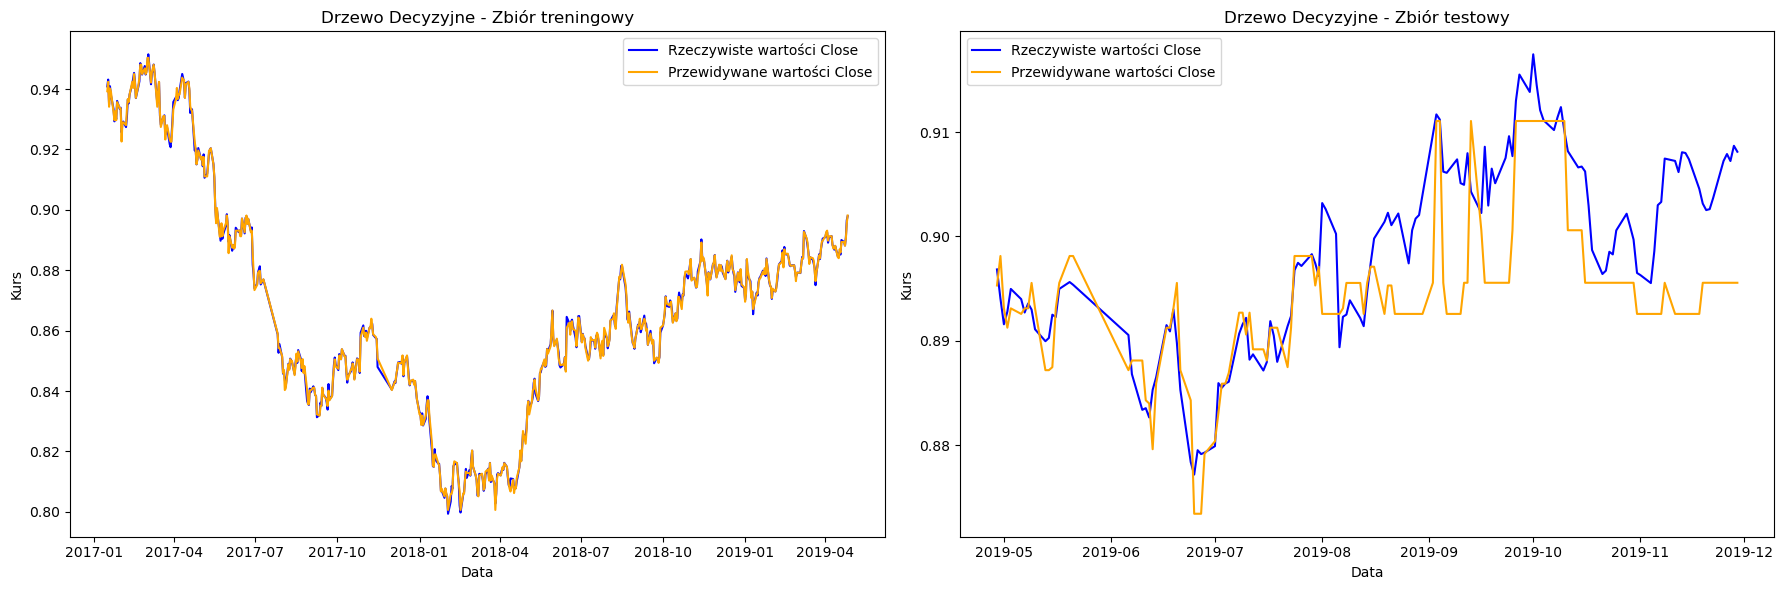

In [49]:
# drzewo decyzyjne close open high
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time
import pandas as pd

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia['t_Open'] = przedpandemia['Open']
przedpandemia['t_High'] = przedpandemia['High']

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

# Tuning parametrów drzewa decyzyjnego
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_

mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Pętla trenująca model 100 razy
for i in range(100):
    X_train = train_data[X_columns]
    y_train = train_data[y_column]

    X_test = test_data[X_columns]
    y_test = test_data[y_column]

    # Tworzenie i trenowanie modelu drzewa decyzyjnego
    model = DecisionTreeRegressor(**best_params)
    model.fit(X_train, y_train)

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train)

    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
        
    # Predykcja na zbiorze testowym
    y_pred_test = model.predict(X_test)

    # Ocena modelu na danych testowych
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)

    if i == 99:
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Drzewo Decyzyjne - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Drzewo Decyzyjne - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('drzewo_coh.png')

Wyniki dla zbioru treningowego:
Średnia MAE: 0.0011, Odchylenie standardowe MAE: 0.0000
Średnia RMSE: 0.0016, Odchylenie standardowe RMSE: 0.0000
Średnia MAPE: 0.1310%, Odchylenie standardowe MAPE: 0.0000

Wyniki dla zbioru testowego:
Średnia MAE: 0.0080, Odchylenie standardowe MAE: 0.0004
Średnia RMSE: 0.0101, Odchylenie standardowe RMSE: 0.0004
Średnia MAPE: 0.8803%, Odchylenie standardowe MAPE: 0.0404
Czas działania: 12.9281 sekundy


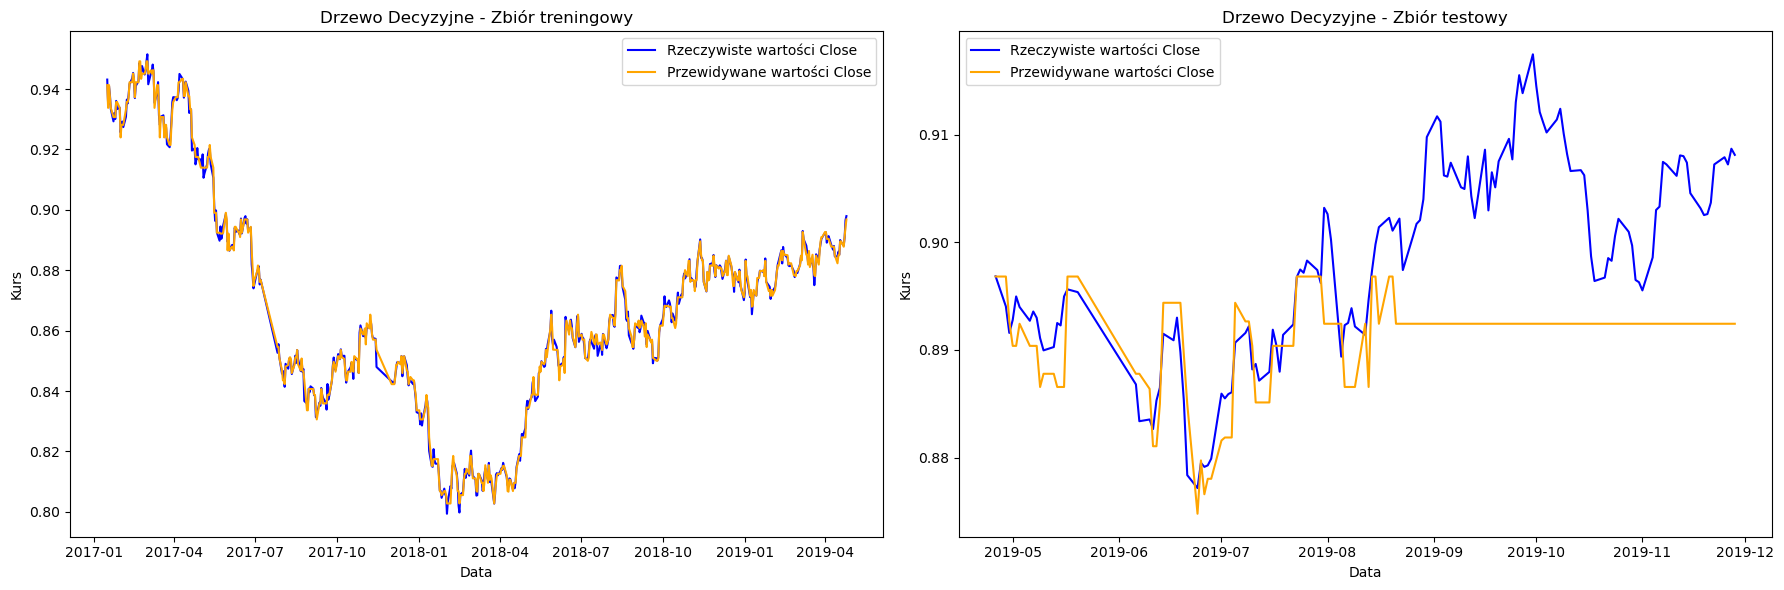

In [50]:
# drzewo decyzyjne close open high + wskazniki analizy technicznej
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import time
import pandas as pd

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

# Tuning parametrów drzewa decyzyjnego
param_grid = {'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_

mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Pętla trenująca model 100 razy
for i in range(100):
    X_train = train_data[X_columns]
    y_train = train_data[y_column]

    X_test = test_data[X_columns]
    y_test = test_data[y_column]

    # Tworzenie i trenowanie modelu drzewa decyzyjnego
    model = DecisionTreeRegressor(**best_params)
    model.fit(X_train, y_train)

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train)

    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    
    # Predykcja na zbiorze testowym
    y_pred_test = model.predict(X_test)

    # Ocena modelu na danych testowych
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if i == 99:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Drzewo Decyzyjne - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_test, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Drzewo Decyzyjne - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('drzewo_tech.png')

18/18 [==============================] - 0s 1ms/step
Wyniki dla zbioru treningowego:
Średnia MAE: 0.0178, Odchylenie standardowe MAE: 0.0013
Średnia RMSE: 0.0236, Odchylenie standardowe RMSE: 0.0013
Średnia MAPE: 0.3110%, Odchylenie standardowe MAPE: 0.0232

Wyniki dla zbioru testowego:
Średnia MAE: 0.0022, Odchylenie standardowe MAE: 0.0002
Średnia RMSE: 0.0029, Odchylenie standardowe RMSE: 0.0002
Średnia MAPE: 0.2471%, Odchylenie standardowe MAPE: 0.0248
Czas działania: 273.7021 sekundy


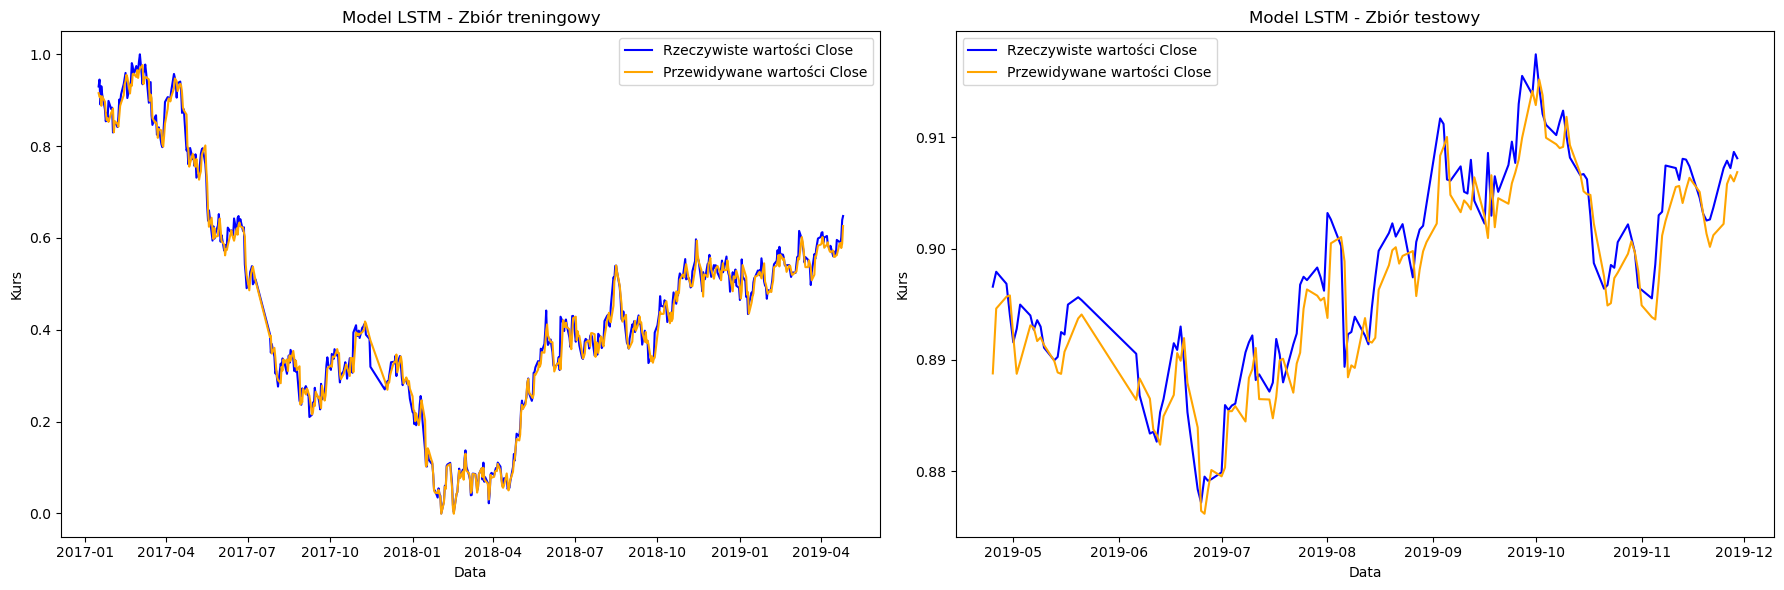

In [33]:
#lstm na close

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Utworzenie modelu LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model.set_weights(model.get_weights())

    # Trenowanie modelu
    #model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=0)
    model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_lstm_scaled = model.predict(X_test_lstm)
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

    # Ocena modelu LSTM
    mae_test = mean_absolute_error(y_test, y_pred_lstm)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_lstm))
    mape_test = np.mean(np.abs((y_test.values - y_pred_lstm.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train_lstm)
    y_pred_lstm_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_lstm_train.flatten()) / y_train.values)) * 100
    # mape_train = np.mean(np.abs((y_train_scaled - y_pred_train.flatten()) / y_train_scaled)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model LSTM - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_lstm, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model LSTM - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)


print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('lstm_close.png')





18/18 [==============================] - 0s 947us/step
Wyniki dla zbioru treningowego:
Średnia MAE: 0.0119, Odchylenie standardowe MAE: 0.0019
Średnia RMSE: 0.0160, Odchylenie standardowe RMSE: 0.0020
Średnia MAPE: 0.2063%, Odchylenie standardowe MAPE: 0.0328

Wyniki dla zbioru testowego:
Średnia MAE: 0.0019, Odchylenie standardowe MAE: 0.0005
Średnia RMSE: 0.0024, Odchylenie standardowe RMSE: 0.0004
Średnia MAPE: 0.2126%, Odchylenie standardowe MAPE: 0.0504
Czas działania: 273.3493 sekundy


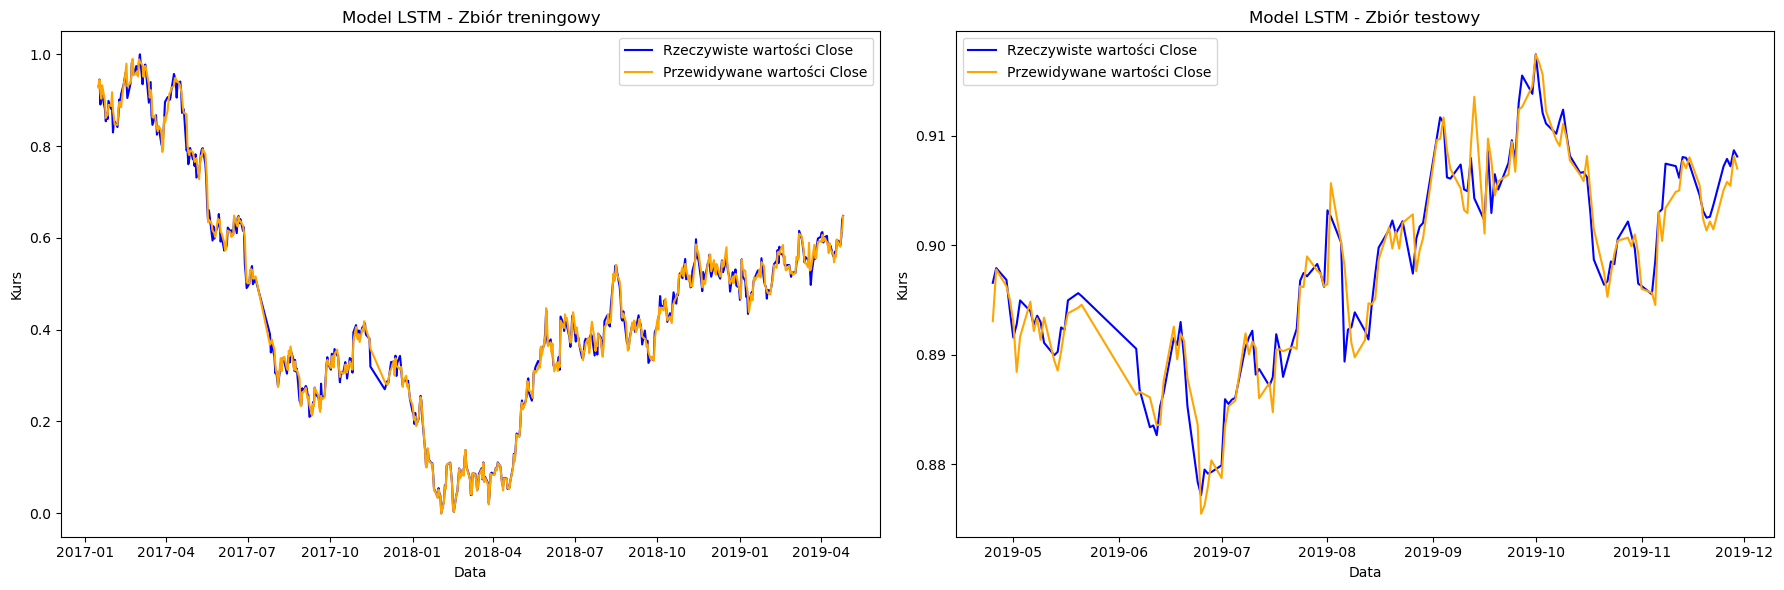

In [10]:
#lstm na close openhigh
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Utworzenie modelu LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model.set_weights(model.get_weights())

    # Trenowanie modelu
    #model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=0)
    model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_lstm_scaled = model.predict(X_test_lstm)
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

    # Ocena modelu LSTM
    mae_test = mean_absolute_error(y_test, y_pred_lstm)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_lstm))
    mape_test = np.mean(np.abs((y_test.values - y_pred_lstm.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train_lstm)
    y_pred_lstm_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_lstm_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model LSTM - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_lstm, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model LSTM - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

In [ ]:
#lstm na close openhigh + analiza techniczna
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Utworzenie modelu LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model.set_weights(model.get_weights())

    # Trenowanie modelu
    #model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=0)
    model.fit(X_train_lstm, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_lstm_scaled = model.predict(X_test_lstm)
    y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

    # Ocena modelu LSTM
    mae_test = mean_absolute_error(y_test, y_pred_lstm)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_lstm))
    mape_test = np.mean(np.abs((y_test.values - y_pred_lstm.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train_lstm)
    y_pred_lstm_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_lstm_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model LSTM - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_lstm, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model LSTM - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

18/18 [==============================] - 0s 914us/step
Wyniki dla zbioru treningowego:
Średnia MAE: 0.0168, Odchylenie standardowe MAE: 0.0013
Średnia RMSE: 0.0224, Odchylenie standardowe RMSE: 0.0014
Średnia MAPE: 0.2917%, Odchylenie standardowe MAPE: 0.0237

Wyniki dla zbioru testowego:
Średnia MAE: 0.0022, Odchylenie standardowe MAE: 0.0002
Średnia RMSE: 0.0029, Odchylenie standardowe RMSE: 0.0002
Średnia MAPE: 0.2475%, Odchylenie standardowe MAPE: 0.0269
Czas działania: 204.2869 sekundy


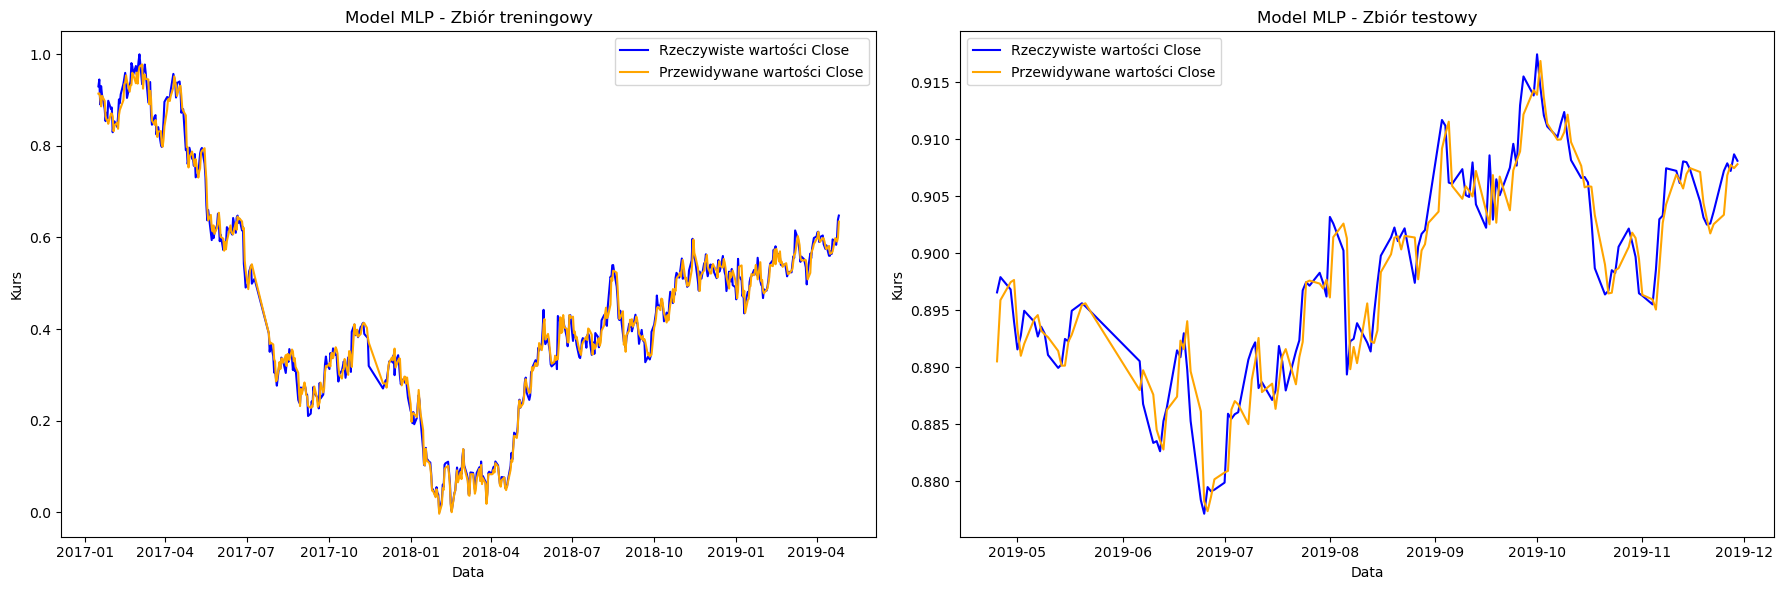

In [51]:
#mlp na close
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_mlp = scaler.fit_transform(X_train)
X_test_mlp = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu MLP
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_mlp.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model.set_weights(model.get_weights())

    # Trenowanie modelu
    model.fit(X_train_mlp, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_mlp_scaled = model.predict(X_test_mlp)
    y_pred_mlp = scaler.inverse_transform(y_pred_mlp_scaled)

    # Ocena modelu mlp
    mae_test = mean_absolute_error(y_test, y_pred_mlp)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_mlp))
    mape_test = np.mean(np.abs((y_test.values - y_pred_mlp.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train_mlp)
    y_pred_mlp_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_mlp_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model MLP - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_mlp, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model MLP - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

In [ ]:
#mpl na close  open high
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Open', 'High', 'Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_mlp = scaler.fit_transform(X_train)
X_test_mlp = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu MLP
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_mlp.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model.set_weights(model.get_weights())

    # Trenowanie modelu
    model.fit(X_train_mlp, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_mlp_scaled = model.predict(X_test_mlp)
    y_pred_mlp = scaler.inverse_transform(y_pred_mlp_scaled)

    # Ocena modelu mlp
    mae_test = mean_absolute_error(y_test, y_pred_mlp)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_mlp))
    mape_test = np.mean(np.abs((y_test.values - y_pred_mlp.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train_mlp)
    y_pred_mlp_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_mlp_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model MLP - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_mlp, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model MLP - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()
        
# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('mlp_coh.png')

In [ ]:
#mlp na close openhigh + analiza techniczna
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_mlp = scaler.fit_transform(X_train)
X_test_mlp = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu MLP
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_mlp.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model.set_weights(model.get_weights())

    # Trenowanie modelu
    model.fit(X_train_mlp, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_mlp_scaled = model.predict(X_test_mlp)
    y_pred_mlp = scaler.inverse_transform(y_pred_mlp_scaled)

    # Ocena modelu mlp
    mae_test = mean_absolute_error(y_test, y_pred_mlp)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_mlp))
    mape_test = np.mean(np.abs((y_test.values - y_pred_mlp.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model.predict(X_train_mlp)
    y_pred_mlp_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model MLP - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_mlp, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model MLP - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('mlp_tech.png')

In [ ]:
#simplernn na close
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_data[X_columns])
X_test_scaled = scaler.transform(test_data[X_columns])
y_train_scaled = scaler.fit_transform(train_data[y_column].values.reshape(-1, 1))
y_test_scaled = scaler.transform(test_data[y_column].values.reshape(-1, 1))

# Przygotowanie danych do modelu SimpleRNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Przygotowanie danych do modelu srnn
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_rnn.set_weights(model_rnn.get_weights())

    # Trenowanie modelu
    model_rnn.fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_rnn_scaled = model_rnn.predict(X_test_rnn)
    y_pred_rnn = scaler.inverse_transform(y_pred_rnn_scaled)

    # Ocena modelu simple rnn
    mae_test = mean_absolute_error(y_test, y_pred_rnn)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_rnn))
    mape_test = np.mean(np.abs((y_test.values - y_pred_rnn.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_rnn.predict(X_train_rnn)
    y_pred_rnn_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_rnn_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model Simple RNN - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_rnn, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model Simple RNN - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()
# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('rnn_close.png')

In [ ]:
#simplernn na close open high
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Open', 'High', 'Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_data[X_columns])
X_test_scaled = scaler.transform(test_data[X_columns])
y_train_scaled = scaler.fit_transform(train_data[y_column].values.reshape(-1, 1))
y_test_scaled = scaler.transform(test_data[y_column].values.reshape(-1, 1))

# Przygotowanie danych do modelu SimpleRNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Przygotowanie danych do modelu srnn
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_rnn.set_weights(model_rnn.get_weights())

    # Trenowanie modelu
    model_rnn.fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_rnn_scaled = model_rnn.predict(X_test_rnn)
    y_pred_rnn = scaler.inverse_transform(y_pred_rnn_scaled)

    # Ocena modelu simple rnn
    mae_test = mean_absolute_error(y_test, y_pred_rnn)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_rnn))
    mape_test = np.mean(np.abs((y_test.values - y_pred_rnn.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_rnn.predict(X_train_rnn)
    y_pred_rnn_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_rnn_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model Simple RNN - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_rnn, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model Simple RNN - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()
        
# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('rnn_coh.png')

In [ ]:
#simplernn na close open high + analiza techniczna
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_data[X_columns])
X_test_scaled = scaler.transform(test_data[X_columns])
y_train_scaled = scaler.fit_transform(train_data[y_column].values.reshape(-1, 1))
y_test_scaled = scaler.transform(test_data[y_column].values.reshape(-1, 1))

# Przygotowanie danych do modelu SimpleRNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Przygotowanie danych do modelu srnn
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_rnn.set_weights(model_rnn.get_weights())

    # Trenowanie modelu
    model_rnn.fit(X_train_rnn, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_rnn_scaled = model_rnn.predict(X_test_rnn)
    y_pred_rnn = scaler.inverse_transform(y_pred_rnn_scaled)

    # Ocena modelu simple rnn
    mae_test = mean_absolute_error(y_test, y_pred_rnn)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_rnn))
    mape_test = np.mean(np.abs((y_test.values - y_pred_rnn.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_rnn.predict(X_train_rnn)
    y_pred_rnn_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_rnn_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model Simple RNN - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_rnn, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model Simple RNN - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()
        
# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('rnn_tech.png')

In [ ]:
#cnn na close
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu CNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Utworzenie modelu CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_cnn.set_weights(model_cnn.get_weights())

    # Trenowanie modelu
    model_cnn.fit(X_train_cnn, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_cnn_scaled = model_cnn.predict(X_test_cnn)
    y_pred_cnn = scaler.inverse_transform(y_pred_cnn_scaled)

    # Ocena modelu simple cnn
    mae_test = mean_absolute_error(y_test, y_pred_cnn)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_cnn))
    mape_test = np.mean(np.abs((y_test.values - y_pred_cnn.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_cnn.predict(X_train_cnn)
    y_pred_cnn_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_cnn_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model CNN - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_cnn, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model CNN - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()
        
# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)

print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('cnn_close.png')

In [ ]:
#cnn na close high open
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu CNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Utworzenie modelu CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_cnn.set_weights(model_cnn.get_weights())

    # Trenowanie modelu
    model_cnn.fit(X_train_cnn, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_cnn_scaled = model_cnn.predict(X_test_cnn)
    y_pred_cnn = scaler.inverse_transform(y_pred_cnn_scaled)

    # Ocena modelu simple cnn
    mae_test = mean_absolute_error(y_test, y_pred_cnn)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_cnn))
    mape_test = np.mean(np.abs((y_test.values - y_pred_cnn.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_cnn.predict(X_train_cnn)
    y_pred_cnn_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_cnn_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model CNN - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_cnn, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model CNN - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()
        
# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)


print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('cnn_coh.png')

In [ ]:
#cnn na close high open + analiza techniczna
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu CNN
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Utworzenie modelu CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_cnn.set_weights(model_cnn.get_weights())

    # Trenowanie modelu
    model_cnn.fit(X_train_cnn, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_cnn_scaled = model_cnn.predict(X_test_cnn)
    y_pred_cnn = scaler.inverse_transform(y_pred_cnn_scaled)

    # Ocena modelu simple cnn
    mae_test = mean_absolute_error(y_test, y_pred_cnn)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_cnn))
    mape_test = np.mean(np.abs((y_test.values - y_pred_cnn.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_cnn.predict(X_train_cnn)
    y_pred_cnn_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_cnn_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model CNN - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_cnn, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model CNN - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

        # Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)
        
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('cnn_tech.png')

In [ ]:
#gru na close
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu GRU
X_train_gru = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Utworzenie modelu GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
    
# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_gru.set_weights(model_gru.get_weights())

    # Trenowanie modelu
    model_gru.fit(X_train_gru, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_gru_scaled = model_gru.predict(X_test_gru)
    y_pred_gru = scaler.inverse_transform(y_pred_gru_scaled)

    # Ocena modelu simple gru
    mae_test = mean_absolute_error(y_test, y_pred_gru)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_gru))
    mape_test = np.mean(np.abs((y_test.values - y_pred_gru.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_gru.predict(X_train_gru)
    y_pred_gru_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_gru_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model GRU - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_gru, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model GRU - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

        # Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)
        
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('gru_close.png')

In [ ]:
#gru na close open high
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)

przedpandemia['t_Close'] = przedpandemia['Close']
przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych - 2:]

X_columns = []
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu GRU
X_train_gru = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Utworzenie modelu GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
    
# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_gru.set_weights(model_gru.get_weights())

    # Trenowanie modelu
    model_gru.fit(X_train_gru, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_gru_scaled = model_gru.predict(X_test_gru)
    y_pred_gru = scaler.inverse_transform(y_pred_gru_scaled)

    # Ocena modelu simple gru
    mae_test = mean_absolute_error(y_test, y_pred_gru)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_gru))
    mape_test = np.mean(np.abs((y_test.values - y_pred_gru.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_gru.predict(X_train_gru)
    y_pred_gru_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_gru_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model GRU - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_gru, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model GRU - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)
        
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('gru_coh.png')





18/18 [==============================] - 0s 925us/step
Wyniki dla zbioru treningowego:
Średnia MAE: 0.0110, Odchylenie standardowe MAE: 0.0029
Średnia RMSE: 0.0149, Odchylenie standardowe RMSE: 0.0034
Średnia MAPE: 0.1909%, Odchylenie standardowe MAPE: 0.0497

Wyniki dla zbioru testowego:
Średnia MAE: 0.0022, Odchylenie standardowe MAE: 0.0006
Średnia RMSE: 0.0027, Odchylenie standardowe RMSE: 0.0006
Średnia MAPE: 0.2419%, Odchylenie standardowe MAPE: 0.0654
Czas działania: 284.1735 sekundy


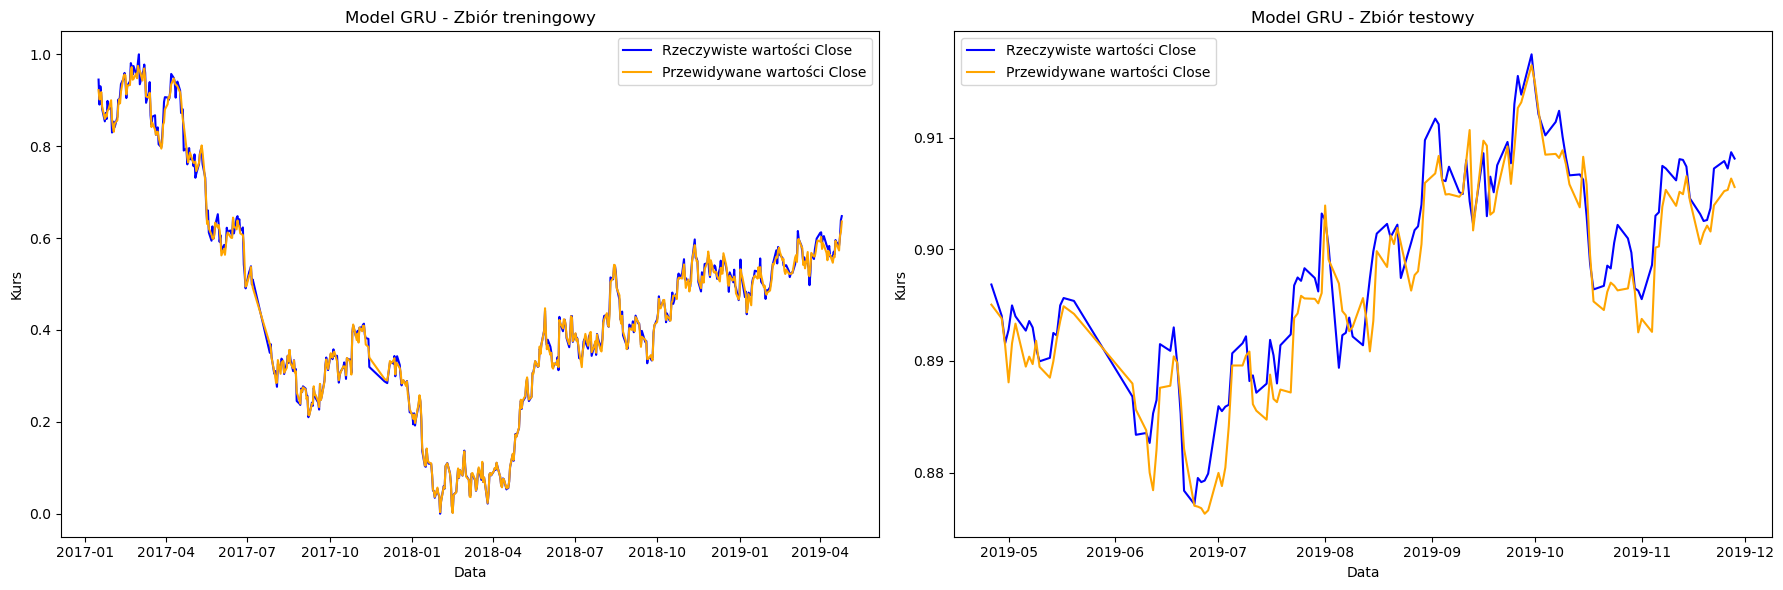

In [16]:
#gru na close open high i tech
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from math import sqrt

start_time = time.time()

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
y_column = 't_Close'

for lag in lags:
    for column in columns_to_shift:
        X_columns.append(f't_(-{lag})_{column}')

X_train = train_data[X_columns]
y_train = train_data[y_column]

X_test = test_data[X_columns]
y_test = test_data[y_column]

# Normalizacja danych
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Przygotowanie danych do modelu GRU
X_train_gru = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Utworzenie modelu GRU
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
    
# Initialize variables to store metrics
mae_train_list = []
rmse_train_list = []
mape_train_list = []

mae_test_list = []
rmse_test_list = []
mape_test_list = []

# Trenowanie modelu 100 razy
num_iterations = 100
for iteration in range(num_iterations):
    # Reset model weights
    model_gru.set_weights(model_gru.get_weights())

    # Trenowanie modelu
    model_gru.fit(X_train_gru, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    # Prognozowanie na danych testowych
    y_pred_gru_scaled = model_gru.predict(X_test_gru)
    y_pred_gru = scaler.inverse_transform(y_pred_gru_scaled)

    # Ocena modelu simple gru
    mae_test = mean_absolute_error(y_test, y_pred_gru)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_gru))
    mape_test = np.mean(np.abs((y_test.values - y_pred_gru.flatten()) / y_test.values)) * 100

    # Predykcja na zbiorze treningowym
    y_pred_train = model_gru.predict(X_train_gru)
    y_pred_gru_train = scaler.inverse_transform(y_pred_train)
    
    # Ocena modelu na danych treningowych
    mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
    rmse_train = sqrt(mean_squared_error(y_train_scaled, y_pred_train))
    mape_train = np.mean(np.abs((y_train.values - y_pred_gru_train.flatten()) / y_train.values)) * 100
    
    # Store metrics for each iteration
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    mape_train_list.append(mape_train)

    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    mape_test_list.append(mape_test)
    
    if iteration == num_iterations-1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        ax1.plot(train_data['Date'], y_train_scaled, label='Rzeczywiste wartości Close', color='blue')
        ax1.plot(train_data['Date'], y_pred_train, label='Przewidywane wartości Close', color='orange')
        ax1.set_title('Model GRU - Zbiór treningowy')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Kurs')
        ax1.legend()

        ax2.plot(test_data['Date'], y_test, label='Rzeczywiste wartości Close', color='blue')
        ax2.plot(test_data['Date'], y_pred_gru, label='Przewidywane wartości Close', color='orange')
        ax2.set_title('Model GRU - Zbiór testowy')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('Kurs')
        ax2.legend()

        plt.tight_layout()
        #plt.show()

# Wyprintuj średnie wyniki i odchylenia standardowe dla zbioru treningowego
mean_mae_train = np.mean(mae_train_list)
mean_rmse_train = np.mean(rmse_train_list)
mean_mape_train = np.mean(mape_train_list)

mean_mae_test = np.mean(mae_test_list)
mean_rmse_test = np.mean(rmse_test_list)
mean_mape_test = np.mean(mape_test_list)

# Standard deviation
std_mae_train = np.std(mae_train_list)
std_rmse_train = np.std(rmse_train_list)
std_mape_train = np.std(mape_train_list)

std_mae_test = np.std(mae_test_list)
std_rmse_test = np.std(rmse_test_list)
std_mape_test = np.std(mape_test_list)
        
print("Wyniki dla zbioru treningowego:")
print(f'Średnia MAE: {mean_mae_train:.4f}, Odchylenie standardowe MAE: {std_mae_train:.4f}')
print(f'Średnia RMSE: {mean_rmse_train:.4f}, Odchylenie standardowe RMSE: {std_rmse_train:.4f}')
print(f'Średnia MAPE: {mean_mape_train:.4f}%, Odchylenie standardowe MAPE: {std_mape_train:.4f}')

print("\nWyniki dla zbioru testowego:")
print(f'Średnia MAE: {mean_mae_test:.4f}, Odchylenie standardowe MAE: {std_mae_test:.4f}')
print(f'Średnia RMSE: {mean_rmse_test:.4f}, Odchylenie standardowe RMSE: {std_rmse_test:.4f}')
print(f'Średnia MAPE: {mean_mape_test:.4f}%, Odchylenie standardowe MAPE: {std_mape_test:.4f}')

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Czas działania: {elapsed_time:.4f} sekundy")

#plt.savefig('gru_tech.png')

In [ ]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Conv1D, Flatten, SimpleRNN, LSTM
from math import sqrt

file_path = r'C:\Users\justy\Desktop\Dane_usdeur\usdeur_przedpandemia.csv'
przedpandemia = pd.read_csv(file_path)

przedpandemia['Date'] = pd.to_datetime(przedpandemia['Date'])
przedpandemia = przedpandemia.sort_values('Date')

# Dodaj kolumnę SAR
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()

# Dodaj kolumny ważonej średniej ruchomej (WMA)
okres_wma = 10
przedpandemia['Close_WMA'] = przedpandemia['Close'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['Open_WMA'] = przedpandemia['Open'].rolling(window=okres_wma, min_periods=1).mean()
przedpandemia['High_WMA'] = przedpandemia['High'].rolling(window=okres_wma, min_periods=1).mean()

max_lag = 10
lags = list(range(1, max_lag + 1))
columns_to_shift = ['Close', 'Open', 'High', 'SAR']

for lag in lags:
    for column in columns_to_shift:
        new_column_name = f't_(-{lag})_{column}'
        przedpandemia[new_column_name] = przedpandemia[column].shift(lag)
        # Dodaj ważoną średnią ruchomą
        wma_column_name = f'{new_column_name}_WMA'
        przedpandemia[wma_column_name] = przedpandemia[new_column_name].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumny dla obydwu wskaźników analizy technicznej
przedpandemia['SAR'] = ta.trend.PSARIndicator(high=przedpandemia['High'], low=przedpandemia['Low'], close=przedpandemia['Close']).psar()
przedpandemia['SAR_WMA'] = przedpandemia['SAR'].rolling(window=okres_wma, min_periods=1).mean()

# Dodaj kolumnę 't_Close'
przedpandemia['t_Close'] = przedpandemia['Close'].shift(-1)

przedpandemia = przedpandemia.dropna()

ilosc_danych = len(przedpandemia)
ilosc_danych_treningowych = int(ilosc_danych * 0.8)

train_data = przedpandemia[:ilosc_danych_treningowych]
test_data = przedpandemia[ilosc_danych_treningowych:]

X_columns_full = ['Close', 'Open', 'High', 'Close_WMA', 'Open_WMA', 'High_WMA', 'SAR', 'SAR_WMA'] + [f't_(-{lag})_{col}' for lag in lags for col in columns_to_shift] + [f't_(-{lag})_{col}_WMA' for lag in lags for col in columns_to_shift]
X_columns_close = ['Close'] + [f't_(-{lag})_{col}' for lag in lags for col in ['Close']] 
X_columns_coh = ['Close', 'Open', 'High'] + [f't_(-{lag})_{col}' for lag in lags for col in ['Close', 'Open', 'High']] 
y_column = 't_Close'

def zbadaj_uczenie(model, X_train, y_train, X_test, y_test, epochs):
    rmse_train = []
    rmse_test = []

    for iteration in range(epochs):
        history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)

        train_loss = history.history['loss'][0]
        rmse_train.append(sqrt(train_loss))
    
        # Ocen model na danych testowych
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        rmse_test.append(sqrt(test_loss))

    return rmse_train, rmse_test

def pokaz_i_zapisz_wykres(plot_name, model_name, train_c, test_c, train_coh, test_coh, train_tech, test_tech):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    fig.suptitle(f'Historia treningu modelu {model_name}', fontsize=20)
    
    x_index = range(1,len(train_c)+1)

    ax1.plot(x_index, train_c, label='Treningowe', color='blue')
    ax1.plot(x_index, test_c, label='Testowe', color='orange')
    ax1.set_title(f'Model {model_name} - Close')
    ax1.set_xlabel('Epoki')
    ax1.set_ylabel('RMSE')
    ax1.legend()

    ax2.plot(x_index, train_coh, label='Treningowe', color='blue')
    ax2.plot(x_index, test_coh, label='Testowe', color='orange')
    ax2.set_title(f'Model {model_name} - Close Open High')
    ax2.set_xlabel('Epoki')
    ax2.set_ylabel('RMSE')
    ax2.legend()

    ax3.plot(x_index, train_tech, label='Treningowe', color='blue')
    ax3.plot(x_index, test_tech, label='Testowe', color='orange')
    ax3.set_title(f'Model {model_name} - Wskaźniki analizy technicznej')
    ax3.set_xlabel('Epoki')
    ax3.set_ylabel('RMSE')
    ax3.legend()

    plt.tight_layout()
    plt.savefig(f'{plot_name}.png')
    plt.show()

errors = []
x_columns_set = [X_columns_close, X_columns_coh, X_columns_full]

In [ ]:
# historia CNN

for s in x_columns_set:
    X_train = train_data[s]
    y_train = train_data[y_column]
    X_test = test_data[s]
    y_test = test_data[y_column]
    
    # Normalizacja danych
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = scaler.transform(y_test.values.reshape(-1, 1))

    # Przygotowanie danych do modelu CNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Utworzenie modelu CNN
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    train_rmse, test_rmse = zbadaj_uczenie(model, X_train, y_train, X_test, y_test, epochs=100)
    errors.append((train_rmse, test_rmse))

pokaz_i_zapisz_wykres('cnn_history', 'CNN', errors[0][0], errors[0][1], errors[1][0], errors[1][1], errors[2][0], errors[2][1])

In [ ]:
# historia GRU
for s in x_columns_set:
    X_train = train_data[s]
    y_train = train_data[y_column]
    X_test = test_data[s]
    y_test = test_data[y_column]
    
    # Normalizacja danych
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = scaler.transform(y_test.values.reshape(-1, 1))

    # Przygotowanie danych
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Utworzenie modelu GRU
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    train_rmse, test_rmse = zbadaj_uczenie(model, X_train, y_train, X_test, y_test, epochs=100)
    errors.append((train_rmse, test_rmse))

pokaz_i_zapisz_wykres('gru_history', 'GRU', errors[0][0], errors[0][1], errors[1][0], errors[1][1], errors[2][0], errors[2][1])

In [ ]:
# historia MLP

for s in x_columns_set:
    X_train = train_data[s]
    y_train = train_data[y_column]
    X_test = test_data[s]
    y_test = test_data[y_column]
    
    # Normalizacja danych
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = scaler.transform(y_test.values.reshape(-1, 1))

    # Utworzenie modelu MLP
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    train_rmse, test_rmse = zbadaj_uczenie(model, X_train, y_train, X_test, y_test, epochs=100)
    errors.append((train_rmse, test_rmse))

pokaz_i_zapisz_wykres('mlp_history', 'MLP', errors[0][0], errors[0][1], errors[1][0], errors[1][1], errors[2][0], errors[2][1])

In [ ]:
# historia LSTM
for s in x_columns_set:
    X_train = train_data[s]
    y_train = train_data[y_column]
    X_test = test_data[s]
    y_test = test_data[y_column]
    
    # Normalizacja danych
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = scaler.transform(y_test.values.reshape(-1, 1))

    # Przygotowanie danych
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Utworzenie modelu LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    train_rmse, test_rmse = zbadaj_uczenie(model, X_train, y_train, X_test, y_test, epochs=100)
    errors.append((train_rmse, test_rmse))

pokaz_i_zapisz_wykres('lstm_history', 'LSTM', errors[0][0], errors[0][1], errors[1][0], errors[1][1], errors[2][0], errors[2][1])

In [ ]:
# historia Simple RNN
for s in x_columns_set:
    X_train = train_data[s]
    y_train = train_data[y_column]
    X_test = test_data[s]
    y_test = test_data[y_column]
    
    # Normalizacja danych
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
    y_test = scaler.transform(y_test.values.reshape(-1, 1))

    # Przygotowanie danych
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Przygotowanie danych do modelu srnn
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    train_rmse, test_rmse = zbadaj_uczenie(model, X_train, y_train, X_test, y_test, epochs=100)
    errors.append((train_rmse, test_rmse))

pokaz_i_zapisz_wykres('simple_rnn_history', 'Simple RNN', errors[0][0], errors[0][1], errors[1][0], errors[1][1], errors[2][0], errors[2][1])